СБОРНЫЙ ПРОЕКТ: Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нам нужно выявить определяющие успешность игры закономерности. Это позволит нам сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [69]:
import pandas as pd
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Подготовка данных:
Заменяем названия столбцов (приводим к нижнему регистру)

In [70]:
data.columns = data.columns.str.lower()

In [71]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Посмотрим наличие дубликатов

In [72]:
data.duplicated().sum()

0

Явных дубликатов не выявлено.

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Так как мы видим, что в столбце user_score числа, а формат у него object. Посмотрим какие уникальные данные в этом столбце есть.

In [74]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данном столбце мы увидели значени tbd. Согласно интернету это абривиатура используется, если какая-то информация еще не определена или решение по вопросу не принято. Тогда это равносильно значению NAN. Можно произвести замену и поменять формат данного столбца на float.
Так же можно изменить тип данных в столбцах year_of_release для удобства работы в дальнейшем.

Перед преобразованием рассмотрим пропуски в таблицах 

In [75]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Из данных мы видимо что самое большое количество пропусков в столбцах - rating (6766 пропусков), user_score (6701 пропусков) и critic_score (8578 пропусков). Т.к. пропусков много мы их оставим т.к. их изменение или удаление может повлиять на корректность итоговой оценки исследования. С пропусками в столбце year_of_release (269) - можем заменить на 0. Так же заменим пропуск в столбце rating на Unknown для дальнейшей обработки этого столбца. А в столбцах name и genre по 2 пропуска. Их удалим.

In [131]:
data = data.dropna(subset=['name']).reset_index(drop=True)
data = data.dropna(subset=['genre']).reset_index(drop=True)
data['year_of_release'] = data['year_of_release'].fillna(0)
data['rating'] = data['rating'].fillna('Unknown')

In [77]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Теперь когда пропуски обработаны, перейдем к преобразованию типа данных:

In [78]:
import numpy as np
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
data['user_score'] = data['user_score'].astype('float')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Теперь посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [80]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Теперь рассмотрим сколько игр выпускалось в разные годы.

In [81]:
data['year_of_release'].describe()

count    16713.000000
mean      1974.191348
std        252.574959
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

В нашей таблице предоставлены данные с 1974 по 2016 год. Построим график.

<AxesSubplot:>

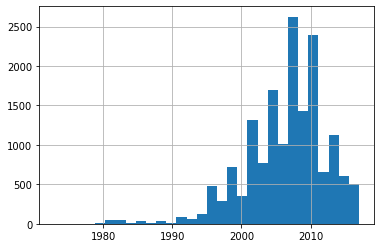

In [82]:
data['year_of_release'].hist(bins = 30, range=(1973, 2017))

Из графика мы видим, что больше всего игр выпускалась после 2000 годов. Попробуем изменить период и рассмотреть более подробно.

<AxesSubplot:>

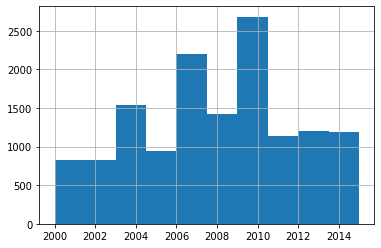

In [83]:
data['year_of_release'].hist(bins = 10, range=(2000, 2015))

Согласно графику мы можем сказать, что самые пиковые года были с 2003 года по 2011 год. В эти года выпускалась больше всего игр.

Рассмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. А так же ответим на вопрос - за какой характерный срок появляются новые и исчезают старые платформы?

In [84]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


ТОП-5 платформ PS2 (1255.77), X360 (971.42), PS3 (939.65), Wii (907.51), DS	(806.12). Построим распределние по годам.

<AxesSubplot:xlabel='platform,year_of_release'>

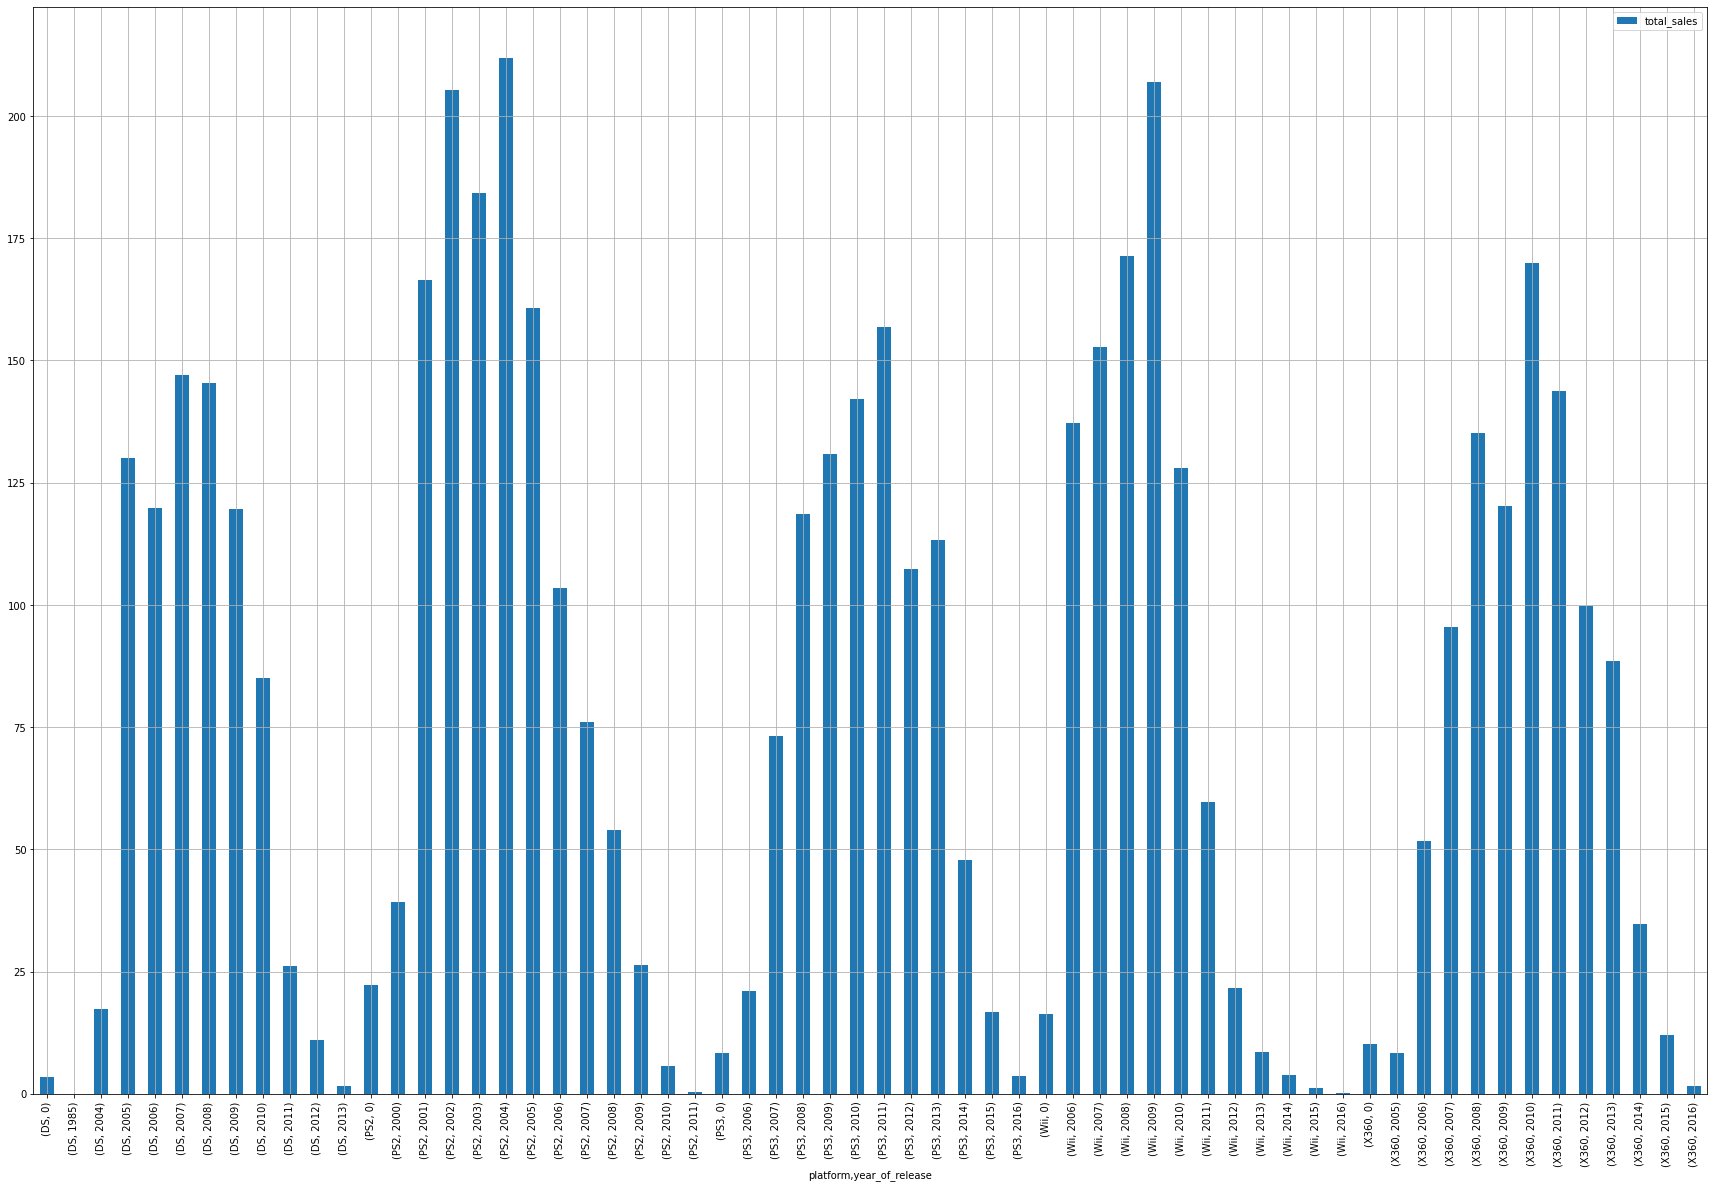

In [85]:
data.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').query('platform in ["PS2", "X360", "PS3", "Wii", "DS"]').plot(y='total_sales', kind='bar', figsize=(30,20), grid=True)

Судя по графику можно сказать что в среднем платформы устаревают через 10 лет. 

Попробуем сделать прогноз на 2017 год. Для этого возьмем более актуальный период с 2006 - 2016 гг. Т.к срок жизни топ-платформ был как раз за этот период.

In [86]:
actual_period = data[data['year_of_release'] >= 2013].reset_index(drop=True)

Рассмотрим какие платформы были за этот период.

In [87]:
actual_period['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Составим список самых продаваемых платформ за этот период.

In [88]:
actual_period.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Возьмем пятерку лучших платформ для распределения - PS4, PS3, XOne, 3DS, X360.

<AxesSubplot:xlabel='year_of_release'>

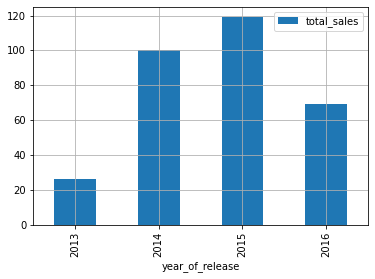

In [89]:
actual_period.query('platform == "PS4"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(y='total_sales', kind='bar', grid=True)

<AxesSubplot:xlabel='year_of_release'>

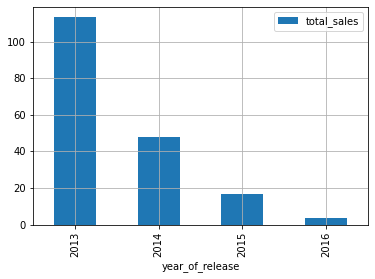

In [90]:
actual_period.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(y='total_sales', kind='bar', grid=True)

<AxesSubplot:xlabel='year_of_release'>

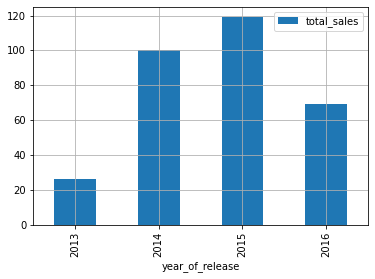

In [91]:
actual_period.query('platform == "PS4"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(y='total_sales', kind='bar', grid=True)

<AxesSubplot:xlabel='year_of_release'>

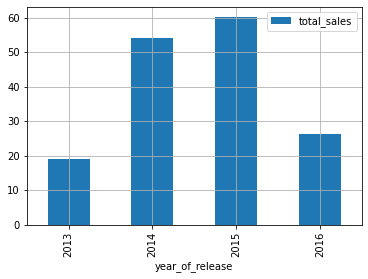

In [92]:
actual_period.query('platform == "XOne"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(y='total_sales', kind='bar', grid=True)

<AxesSubplot:xlabel='year_of_release'>

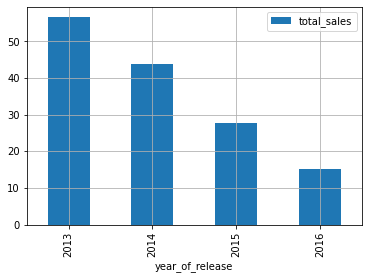

In [93]:
actual_period.query('platform == "3DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(y='total_sales', kind='bar', grid=True)

<AxesSubplot:xlabel='year_of_release'>

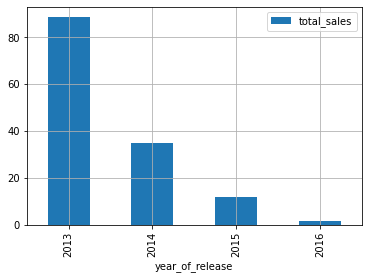

In [94]:
actual_period.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(y='total_sales', kind='bar', grid=True)

Исходя из графика можно сделать вывод, что в 2017 году еще актуальны будут платформы PS4, XOne, 3DS. Остальные платформы уже уходят на нет.

Теперь построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

<AxesSubplot:>

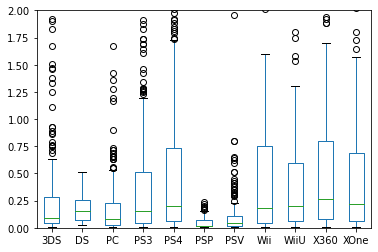

In [95]:
import seaborn as sns
actual_period.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box', ylim=(0,2))

Из графика мы видим, что значения продаж у PS3, PS4, Wii, WiiU, X360 и XOne намного больше медианы, что выделяет эти платформы как более популярные.

Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Для работы возьмем одну из популярных платформ PS4.

-0.031957110204556376

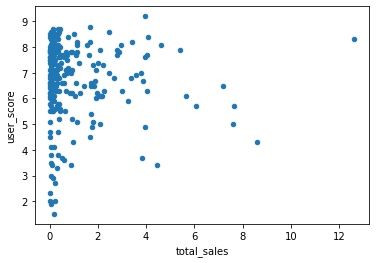

In [96]:
actual_period[actual_period['platform'] == 'PS4'].plot(x='total_sales', y='user_score', kind='scatter')
actual_period[actual_period['platform'] == 'PS4']['total_sales'].corr(actual_period[actual_period['platform'] == 'PS4']['user_score'])

0.406567902061781

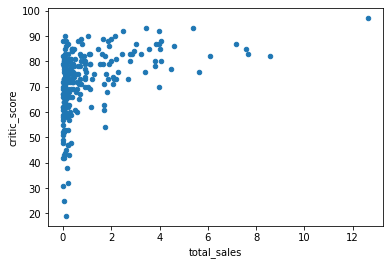

In [97]:
actual_period[actual_period['platform'] == 'PS4'].plot(x='total_sales', y='critic_score', kind='scatter')
actual_period[actual_period['platform'] == 'PS4']['total_sales'].corr(actual_period[actual_period['platform'] == 'PS4']['critic_score'])

Исходя из графика можно сделать вывод, что оценки критиков и пользователей почти одианоко влияют на продажи. Но корреляция показала, что оценка критиков имеет небольшое влияение, чем оценки пользователей.

-0.0011216242093378534

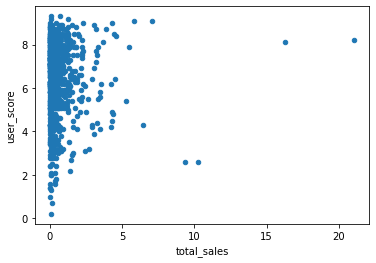

In [98]:
actual_period[actual_period['platform'] != 'PS4'].plot(x='total_sales', y='user_score', kind='scatter')
actual_period[actual_period['platform'] != 'PS4']['total_sales'].corr(actual_period[actual_period['platform'] != 'PS4']['user_score'])

0.2812510848217566

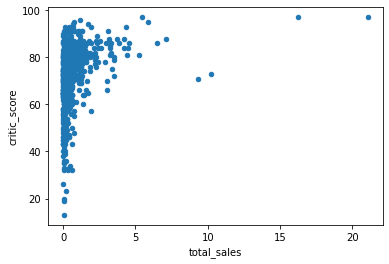

In [99]:
actual_period[actual_period['platform'] != 'PS4'].plot(x='total_sales', y='critic_score', kind='scatter')
actual_period[actual_period['platform'] != 'PS4']['total_sales'].corr(actual_period[actual_period['platform'] != 'PS4']['critic_score'])

По другим платформам ситуация не изменилась. Так же небольшое влияение имеет оценка критиков на продажи.

Рассмотри общее распределение игр по жанрам.

In [100]:
actual_period['genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

Самые популярные жанры - Action, Role-Playing, Adventure, Sports, Shooter, Misc.

In [101]:
actual_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales')

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Игры с теми же жанрами можно сказать самые продаваемые.

In [102]:
actual_period.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,766.0,0.420196,1.253909,0.01,0.03,0.110,0.3375,21.05
Adventure,245.0,0.096490,0.216445,0.01,0.02,0.030,0.0700,1.66
Fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
Misc,155.0,0.405290,1.007985,0.01,0.03,0.100,0.3300,9.18
Platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
Puzzle,17.0,0.186471,0.325172,0.01,0.02,0.060,0.1100,1.19
Racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
Role-Playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
Shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63


Мы видим, что у самые продаваемых жанров есть небольшая разница между медианым и средним значением и очень большое стандартное отклонение. А у менее продаваемых жанров игр так же есть разница между медианой и средним, но стандартное отклоение намного меньше. Их данных мы видим что лидером является жанр Shooter. 

Исходя из данных то ТОП-5 - Action, Shooter, Sports, Role-Playing, Misc. Adventure - хоть и популярный, но не прибыльный жанр. А Platform наоборот, хоть и не самый популярные жанр, но более прибыльный. В антирейтинге у нас - Puzzle, Strategy, Simulation и Fighting. Но благодаря данным о среднем значение и медианы, а так же стандартным отклонением - мы можем с уверенностью сказать что лидером продаж является жанр Shooter.

Теперь составим портрет пользователя каждого региона.

          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20


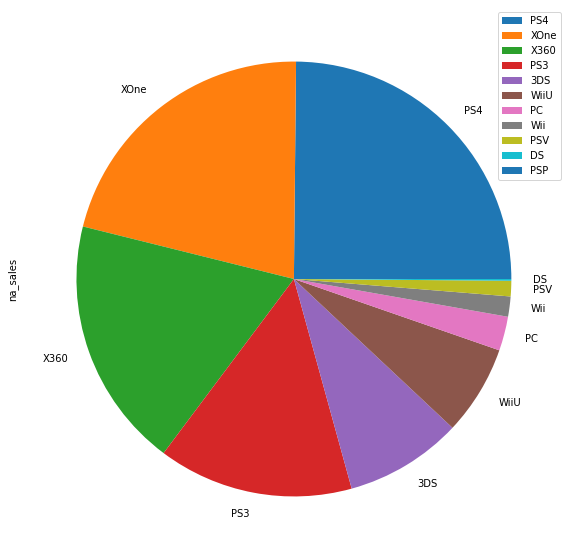

In [121]:
actual_period.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).plot(kind='pie', figsize=(10,10), y= 'na_sales')
print(actual_period.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head())

              na_sales
genre                 
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49


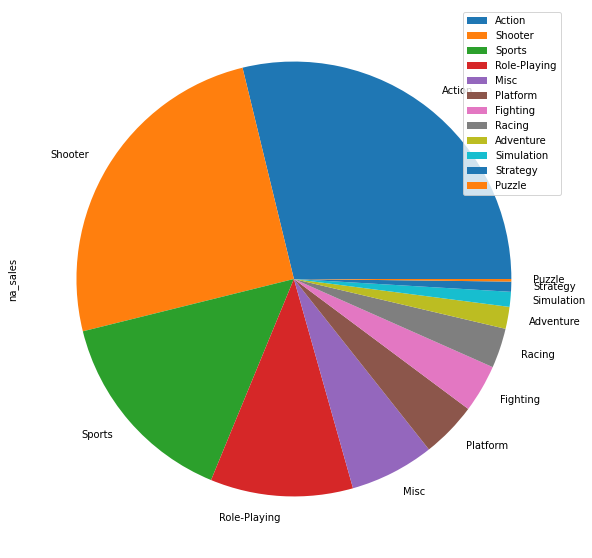

In [123]:
actual_period.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).plot(kind='pie', figsize=(10,10), y= 'na_sales')
print(actual_period.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head())

Из данных мы видим, что в Северной Америке самые популярная платформа PS4, чуть меньше XOne и X360. В жанрах же лидирует Action, Shooter и Sports

          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96


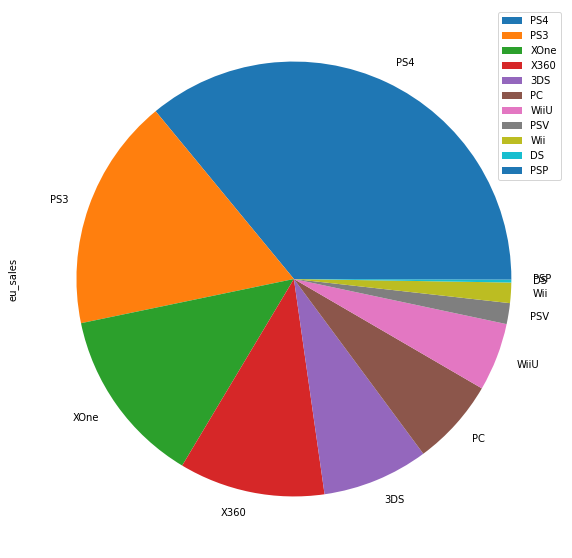

In [124]:
actual_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).plot(kind='pie', figsize=(10,10), y= 'eu_sales')
print(actual_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head())

              eu_sales
genre                 
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19


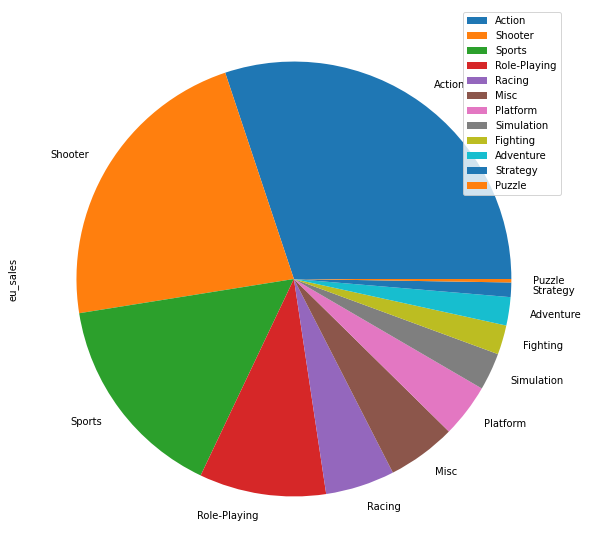

In [125]:
actual_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).plot(kind='pie', figsize=(10,10), y= 'eu_sales')
print(actual_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head())

Европецы так же предпочитаю PS4, но вторая по популярности платформа PS3 и на третьем месте XOne. А вот в жанрах Европейцы чуть ли не идентичны с жителями Северной Америки.

          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88


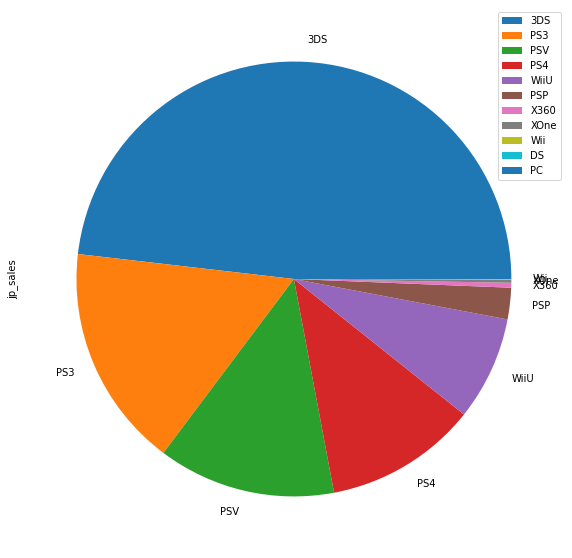

In [126]:
actual_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).plot(kind='pie', figsize=(10,10), y= 'jp_sales')
print(actual_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head())

              jp_sales
genre                 
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61


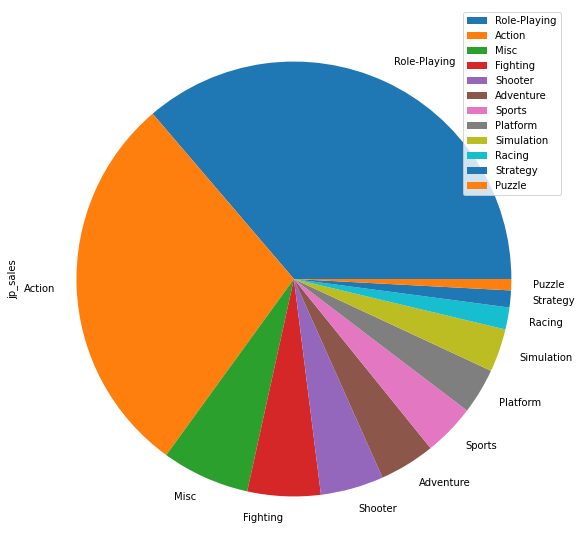

In [127]:
actual_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).plot(kind='pie', figsize=(10,10), y= 'jp_sales')
print(actual_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head())

В Японии дела обстоят совсем иначе. Японцы любят играть в основном на 3DS. Больше половины предпочитают данную платформу. Возможно дело в том, что это их платформа. Любимые жанры у японцев - Role-Playing, Action. Данные жанры можно сказать разделили попалам предпочтения среди японцев.

Теперь рассмотрим влияние рейтинга ESRB на регионы.

<AxesSubplot:title={'center':'Рейтинг ESRB в Северной Америке'}, xlabel='rating'>

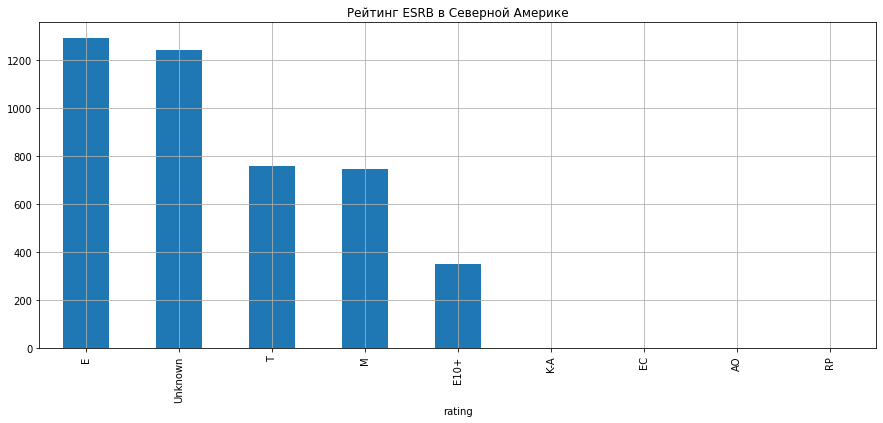

In [135]:
na_rating = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
na_rating.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(15,6), grid=True, title = 'Рейтинг ESRB в Северной Америке')

Мы видим что в Северной Америке самые продаваемые игры с рейтингом Е. На втором месте игры без рейтинга.

<AxesSubplot:title={'center':'Рейтинг ESRB в Европе'}, xlabel='rating'>

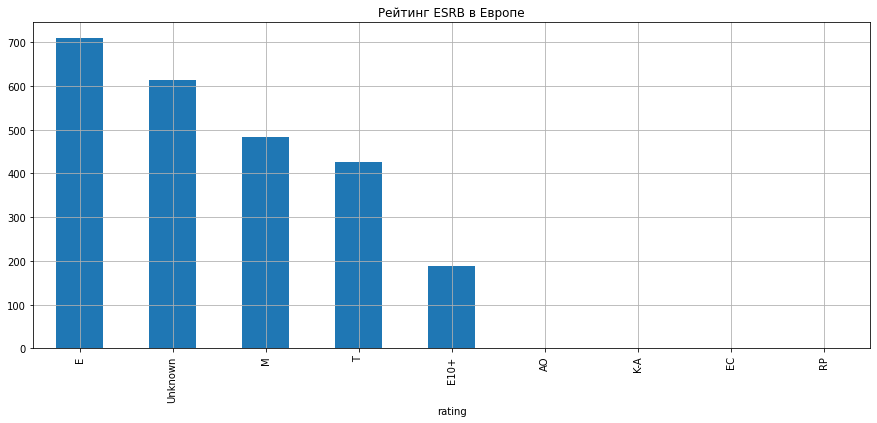

In [138]:
eu_rating = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
eu_rating.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(15,6), grid=True, title = 'Рейтинг ESRB в Европе')

В Европе картина выглядит можно сказать идентично. Разница только в 3-м и 4-м месте рейтинга.

<AxesSubplot:title={'center':'Рейтинг ESRB в Японии'}, xlabel='rating'>

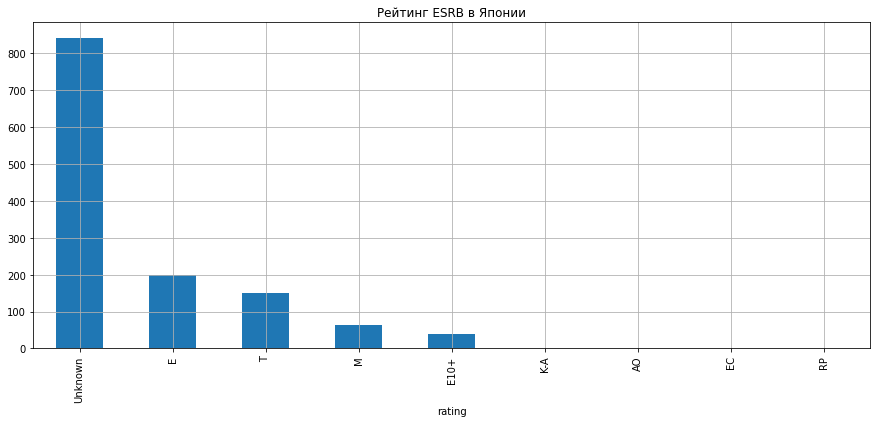

In [139]:
jp_rating = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
jp_rating.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(15,6), grid=True, title = 'Рейтинг ESRB в Японии')

А вот японцы как всегда отличились. В Японии самые продаваемые игры без рейтинга.

<AxesSubplot:title={'center':'Рейтинг ESRB в других регионах'}, xlabel='rating'>

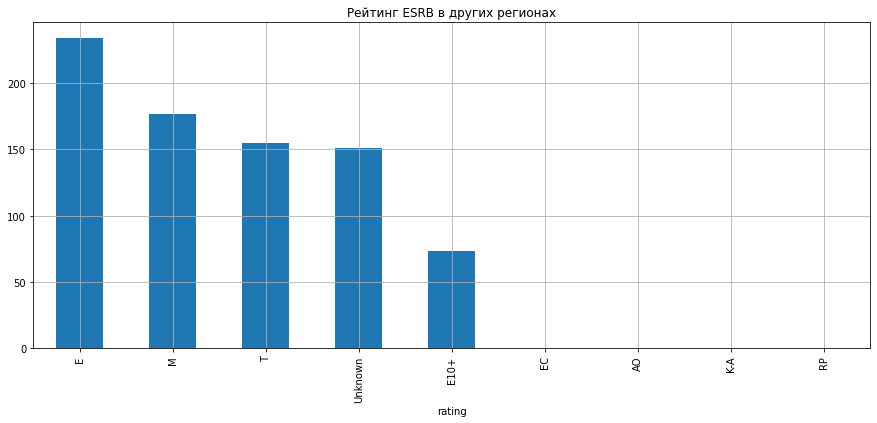

In [141]:
other_rating = data.groupby('rating')['other_sales'].sum().sort_values(ascending=False)
other_rating.plot(x = 'rating', y = 'other_sales', kind = 'bar', figsize=(15,6), grid=True, title = 'Рейтинг ESRB в других регионах')

В других регионах лидирует игры с рейтинг E, M и T. Игры без рейтинга заняли 4 место.

Можно с уверенность сказать, что японцы не обращают внимание на рейтинг данной компании, чтобы приобрести себе игру. Что нельзя сказать о других регионах. Но утверждать, что рейтинг имеет сильное влияение на покупку тоже утверждать нельзя.

Исходя из данных можно сделать вывод, что данные рейтинг в основном влияет на страны Европы и Северную Америку. 

Теперь проверим гипотезу: Средние пользовательские рейтинги платформ XOne и PC одинаковые. Сформулирем: Нулевая гипотеза: Средние пользовательские рейтинги платформ XOne и PC одинаковые; Альтернативная гипотеза: Средние пользовательские рейтинги платформ XOne и PC различаются. Для проверки гипотезы возьмем специальный метод о равенстве среднего двух генеральных совокупностей взятым из них выборкам - ttest_ind.

In [110]:
xone = actual_period[(actual_period['platform'] == 'XOne') &  (actual_period['user_score'] > 0)]['user_score']
pc = actual_period[(actual_period['platform'] == 'PC') &  (actual_period['user_score'] > 0)]['user_score']

In [111]:
xone.mean()

6.521428571428572

In [112]:
pc.mean()

6.2696774193548395

In [113]:
from scipy import stats as st
alpha = .05
results = st.ttest_ind(actual_period[actual_period['platform'] == 'PC']['user_score'].dropna(), actual_period[actual_period['platform'] == 'XOne']['user_score'].dropna())
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Из данных мы видим, что рейтинги не сильно отличаются у платформ. У нас не получилось опровергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ одинаковые. 

Теперь проверим гипотезу: •	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Сформулирем: Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые; Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Для проверки гипотезы возьмем специальный метод о равенстве среднего двух генеральных совокупностей взятым из них выборкам - ttest_ind.

In [114]:
action = actual_period[(actual_period['genre'] == 'Action') &  (actual_period['user_score'] > 0)]['user_score']
sports = actual_period[(actual_period['genre'] == 'Sports') &  (actual_period['user_score'] > 0)]['user_score']

In [115]:
action.mean()

6.837532133676092

In [116]:
sports.mean()

5.238124999999999

In [117]:
alpha = .05
results = st.ttest_ind(actual_period[actual_period['genre'] == 'Action']['user_score'].dropna(), actual_period[actual_period['genre'] == 'Sports']['user_score'].dropna())
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Из данных мы видим, что средние пользовательские рейтинги жанров Action и Sports разные, что и подтвердил наш метод.

Общий вывод: Мы можем сказать, что больше всего игр выпускалась после 2000 годов. Самые пиковые года были с 2003 года по 2011 год. В эти года выпускалась больше всего игр. ТОП-5 платформ PS2, X360, PS3, Wii, DS. В среднем платформы устаревают через 10 лет. Так же можно сказать, что в 2017 году еще актуальны будут платформы PS4, XOne, 3DS. Остальные платформы уже уходят на нет. Оценка критиков имеет небольшое влияение, чем оценки пользователей на продажи. ТОП-5 жанров - Action, Shooter, Sports, Role-Playing, Misc. Adventure - хоть и популярный, но не прибыльный жанр. А Platform наоборот, хоть и не самый популярный жанр, но более прибыльный. В антирейтинге у нас - Puzzle, Strategy, Simulation и Fighting. Европейцы и Американцы имеют схожие предпочтения, что в жанрах, что в платформах. Японцы кардинально отличаются. Единственная схожасть - это жанр игр Action. 

